# Звіт до лабораторної роботи: Застосування методів лінійного програмування

## Вступ
Лінійне програмування (ЛП) є потужним інструментом оптимізації задач у різних галузях. У цій роботі застосовується метод для оптимізації прибутку в ігровій задачі з аукціоном.

## Формулювання задачі

| Предмет | Прибуток | Вартість |
|--------|----------|----------|
| 1      | 10       | 8        |
| 2      | 7        | 7        |
| 3      | 5        | 12       |

Мета: максимізувати цільову функцію:

$$ Z = 10x_1 + 7x_2 + 5x_3 $$

За умови бюджетного обмеження:

$$ 8x_1 + 7x_2 + 12x_3 \leq 100 $$

Та обмежень:

$$ x_1, x_2, x_3 \geq 0 $$

## Візуалізація площини обмежень

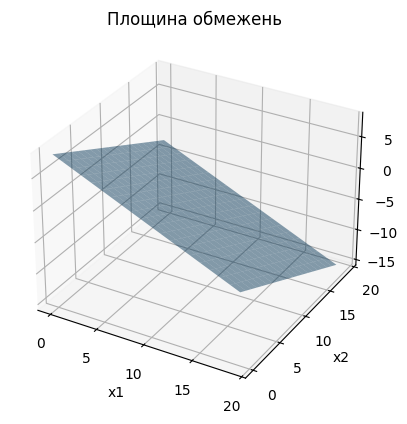

In [6]:
import numpy as np
import matplotlib.pyplot as plt

B = 100
x1 = np.arange(0, 20)
x2 = np.arange(0, 20)
x1, x2 = np.meshgrid(x1, x2)
x3 = (B - 8*x1 - 7*x2)/12

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Площина обмежень')
plt.show()

## Проєкція обмежень

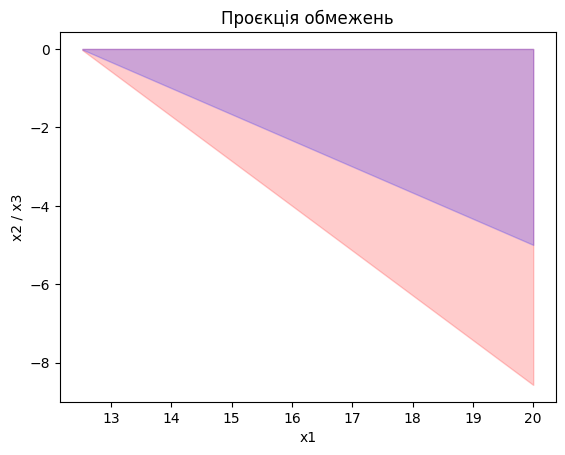

In [7]:
x1 = np.linspace(0, 20, 100)
x21 = (B-8*x1)/7
x31 = (B-8*x1)/12

plt.fill_between(x1, x21, 0, where=x21<0, alpha=0.2, color='red')
plt.fill_between(x1, x31, 0, where=x31<0, alpha=0.2, color='blue')
plt.xlabel('x1')
plt.ylabel('x2 / x3')
plt.title('Проєкція обмежень')
plt.show()

## Розв'язання задачі

In [8]:
%pip install scipy
from scipy.optimize import linprog

c = np.array([10, 7, 5])
A = np.array([[8, 7, 12]])
b = np.array([B])
bnd = [(0, None), (0, None), (0, None)]

res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

x1, x2, x3 = res.x
profit = -res.fun

print(f"Кількість предмету 1: {x1:.2f}")
print(f"Кількість предмету 2: {x2:.2f}")
print(f"Кількість предмету 3: {x3:.2f}")
print(f"Загальний прибуток: {profit:.2f} золотих")

Note: you may need to restart the kernel to use updated packages.
Кількість предмету 1: 12.50
Кількість предмету 2: 0.00
Кількість предмету 3: 0.00
Загальний прибуток: 125.00 золотих


## Висновки

Ми розглянули задачу оптимізації у грі з аукціоном у рамках лінійного програмування. Розрахунки показали, як можна скористатися потужним інструментарієм Python для вирішення практичних задач оптимізації.